# ***Kernel Density Based Linear Regression***

   *Roshan Niranjan Kalpavruksha*

### Comparing **SIMPLE LINEAR REGRESSION** with **KERNEL DENSITY BASED LINEAR REGRESSION**

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
print(california.data.shape)

(20640, 8)


Simple Linear Regression: MSE = 0.5559, R² = 0.5758
Gaussian Kernel: Best MSE = 0.5550, Best R² = 0.5764, Best Bandwidth = 5.0
Uniform Kernel: Best MSE = 0.5559, Best R² = 0.5758, Best Bandwidth = 5.0
Triangular Kernel: Best MSE = 0.5561, Best R² = 0.5756, Best Bandwidth = 5.0
Cosine Kernel: Best MSE = 0.5547, Best R² = 0.5767, Best Bandwidth = 5.0
Quadratic Kernel: Best MSE = 0.5558, Best R² = 0.5759, Best Bandwidth = 5.0
Triweight Kernel: Best MSE = 0.5580, Best R² = 0.5741, Best Bandwidth = 5.0


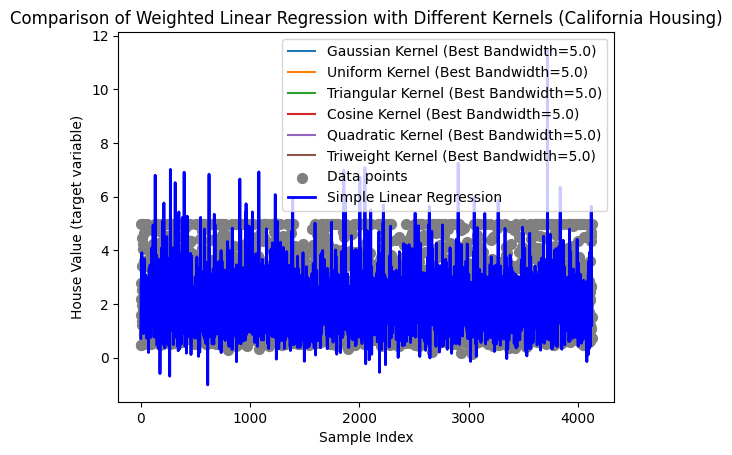


Best Kernel: Cosine with MSE = 0.5547, R² = 0.5767


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_scaled, y_train)
y_simple_pred = simple_model.predict(X_test_scaled)

# Calculate MSE and R² for simple linear regression
simple_mse = mean_squared_error(y_test, y_simple_pred)
simple_r2 = r2_score(y_test, y_simple_pred)
print(f'Simple Linear Regression: MSE = {simple_mse:.4f}, R² = {simple_r2:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results = []

# Evaluate each kernel with grid search for bandwidth tuning
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel
    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

    # Plot the best performing kernel
    weights = calculate_weights(X_train_scaled, y_train, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(np.arange(len(y_test)), y_weighted_pred, label=f'{name} Kernel (Best Bandwidth={best_bandwidth})')

# Plotting the simple linear regression
plt.scatter(np.arange(len(y_test)), y_test, s=50, label='Data points', color='gray')
plt.plot(np.arange(len(y_test)), y_simple_pred, label='Simple Linear Regression', color='blue', linewidth=2)

plt.title('Comparison of Weighted Linear Regression with Different Kernels (California Housing)')
plt.xlabel('Sample Index')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Introduced 50 outliers***

Simple Linear Regression with Outliers: MSE = 0.5688, R² = 0.5659
Gaussian Kernel with Outliers: Best MSE = 0.5552, Best R² = 0.5763, Best Bandwidth = 5.0
Uniform Kernel with Outliers: Best MSE = 0.5560, Best R² = 0.5757, Best Bandwidth = 5.0
Triangular Kernel with Outliers: Best MSE = 0.5556, Best R² = 0.5760, Best Bandwidth = 5.0
Cosine Kernel with Outliers: Best MSE = 0.5547, Best R² = 0.5767, Best Bandwidth = 5.0
Quadratic Kernel with Outliers: Best MSE = 0.5553, Best R² = 0.5763, Best Bandwidth = 5.0
Triweight Kernel with Outliers: Best MSE = 0.5568, Best R² = 0.5751, Best Bandwidth = 5.0


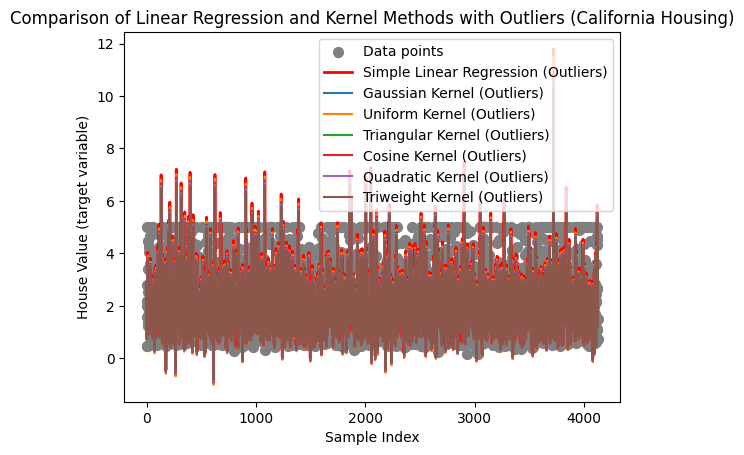


Best Kernel: Cosine with MSE = 0.5547, R² = 0.5767


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 50  # Number of outliers
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)  # Randomly select indices for outliers

# Add large random values as outliers (e.g., 5 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers  # Replace the selected indices with outliers

# Fit the simple linear regression model with outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for the simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with outliers
plt.scatter(np.arange(len(y_test)), y_test, s=50, label='Data points', color='gray')
plt.plot(np.arange(len(y_test)), y_simple_pred_with_outliers, label='Simple Linear Regression (Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(np.arange(len(y_test)), y_weighted_pred, label=f'{name} Kernel (Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with Outliers (California Housing)')
plt.xlabel('Sample Index')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Introduced 200 outliers***

Simple Linear Regression with More Outliers: MSE = 0.7392, R² = 0.4359
Gaussian Kernel with More Outliers: Best MSE = 0.5548, Best R² = 0.5766, Best Bandwidth = 2.0
Uniform Kernel with More Outliers: Best MSE = 0.5557, Best R² = 0.5759, Best Bandwidth = 5.0
Triangular Kernel with More Outliers: Best MSE = 0.5548, Best R² = 0.5766, Best Bandwidth = 5.0
Cosine Kernel with More Outliers: Best MSE = 0.5548, Best R² = 0.5766, Best Bandwidth = 5.0
Quadratic Kernel with More Outliers: Best MSE = 0.5546, Best R² = 0.5767, Best Bandwidth = 5.0
Triweight Kernel with More Outliers: Best MSE = 0.5549, Best R² = 0.5766, Best Bandwidth = 5.0


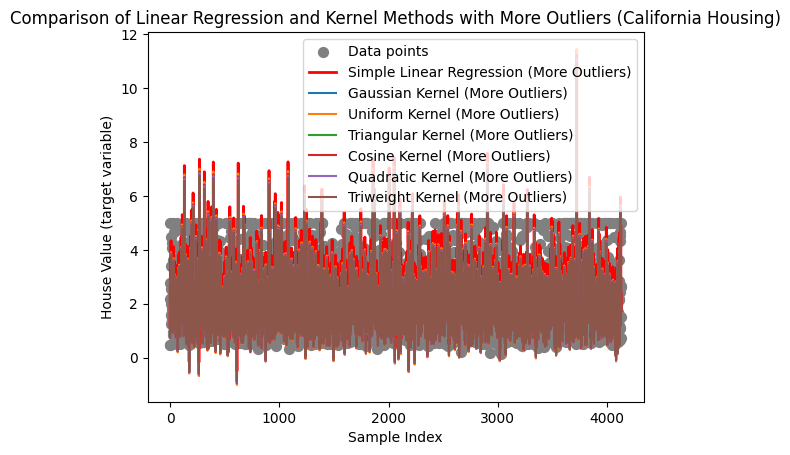


Best Kernel: Quadratic with MSE = 0.5546, R² = 0.5767


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase the number of outliers in the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 200  # Increase the number of outliers for a stronger effect
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)

# Add large random values as outliers (e.g., 10 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers

# Fit the simple linear regression model with more outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for the simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with More Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with More Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with more outliers
plt.scatter(np.arange(len(y_test)), y_test, s=50, label='Data points', color='gray')
plt.plot(np.arange(len(y_test)), y_simple_pred_with_outliers, label='Simple Linear Regression (More Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(np.arange(len(y_test)), y_weighted_pred, label=f'{name} Kernel (More Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with More Outliers (California Housing)')
plt.xlabel('Sample Index')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Introduced 350 outliers***

Simple Linear Regression with More Outliers: MSE = 1.1043, R² = 0.1573
Gaussian Kernel with More Outliers: Best MSE = 0.5554, Best R² = 0.5762, Best Bandwidth = 5.0
Uniform Kernel with More Outliers: Best MSE = 0.5554, Best R² = 0.5762, Best Bandwidth = 5.0
Triangular Kernel with More Outliers: Best MSE = 0.5559, Best R² = 0.5758, Best Bandwidth = 5.0
Cosine Kernel with More Outliers: Best MSE = 0.5556, Best R² = 0.5760, Best Bandwidth = 5.0
Quadratic Kernel with More Outliers: Best MSE = 0.5558, Best R² = 0.5759, Best Bandwidth = 5.0
Triweight Kernel with More Outliers: Best MSE = 0.5561, Best R² = 0.5756, Best Bandwidth = 5.0


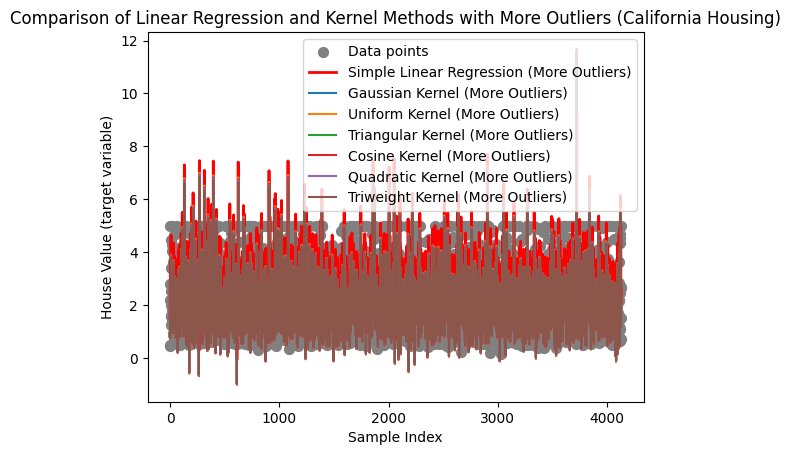


Best Kernel: Uniform with MSE = 0.5554, R² = 0.5762


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase the number of outliers in the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 350  # Increase the number of outliers for a stronger effect
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)

# Add large random values as outliers (e.g., 10 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers

# Fit the simple linear regression model with more outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for the simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with More Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with More Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with more outliers
plt.scatter(np.arange(len(y_test)), y_test, s=50, label='Data points', color='gray')
plt.plot(np.arange(len(y_test)), y_simple_pred_with_outliers, label='Simple Linear Regression (More Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(np.arange(len(y_test)), y_weighted_pred, label=f'{name} Kernel (More Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with More Outliers (California Housing)')
plt.xlabel('Sample Index')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Checked on the next dataset - "Forest Fire"***

Simple Linear Regression with Outliers: MSE = 9.9511, R² = -3.5276
Gaussian Kernel with Outliers: Best MSE = 2.1681, Best R² = 0.0135, Best Bandwidth = 5.0
Uniform Kernel with Outliers: Best MSE = 2.1650, Best R² = 0.0150, Best Bandwidth = 5.0
Triangular Kernel with Outliers: Best MSE = 2.3161, Best R² = -0.0538, Best Bandwidth = 5.0
Cosine Kernel with Outliers: Best MSE = 2.2532, Best R² = -0.0252, Best Bandwidth = 5.0
Quadratic Kernel with Outliers: Best MSE = 2.3564, Best R² = -0.0722, Best Bandwidth = 5.0
Triweight Kernel with Outliers: Best MSE = 2.4834, Best R² = -0.1299, Best Bandwidth = 5.0


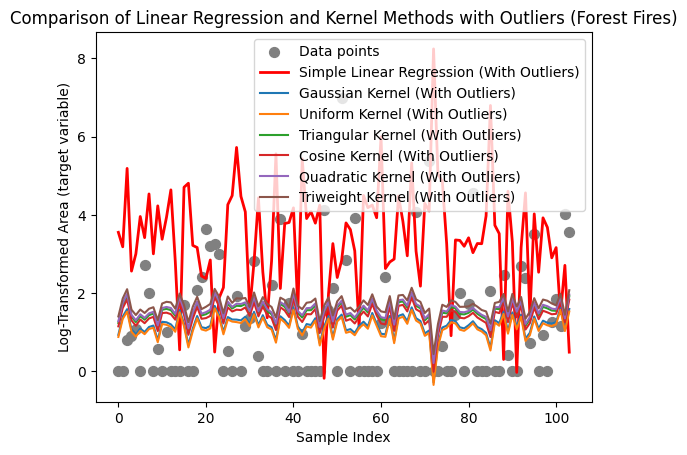


Best Kernel: Uniform with MSE = 2.1650, R² = 0.0150


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load the Forest Fires Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

# Preprocess the dataset
df = df.drop(columns=["month", "day"])  # Remove categorical variables
X = df.drop(columns=["area"])  # Features
y = np.log1p(df["area"])  # Log-transform the target to reduce skewness

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add significant outliers to the target variable `y`
np.random.seed(42)
n_outliers = 20  # Add outliers to emphasize kernel methods
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers.iloc[outlier_indices] = outliers

# Fit the simple linear regression model with outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    y_train = np.array(y_train)  # Convert to NumPy array to allow multi-dimensional indexing
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with more outliers
plt.scatter(np.arange(len(y_test)), y_test, s=50, label='Data points', color='gray')
plt.plot(np.arange(len(y_test)), y_simple_pred_with_outliers, label='Simple Linear Regression (With Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(np.arange(len(y_test)), y_weighted_pred, label=f'{name} Kernel (With Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with Outliers (Forest Fires)')
plt.xlabel('Sample Index')
plt.ylabel('Log-Transformed Area (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Applied PCA to Data and then fit SLR and KDLR (50 outliers)***

Simple Linear Regression with PCA (Outliers): MSE = 1.3247, R² = -0.0109
Gaussian Kernel with PCA (Outliers): Best MSE = 1.3095, Best R² = 0.0007, Best Bandwidth = 0.5
Uniform Kernel with PCA (Outliers): Best MSE = 1.3098, Best R² = 0.0004, Best Bandwidth = 5.0
Triangular Kernel with PCA (Outliers): Best MSE = 1.3097, Best R² = 0.0005, Best Bandwidth = 1.0
Cosine Kernel with PCA (Outliers): Best MSE = 1.3095, Best R² = 0.0007, Best Bandwidth = 1.0
Quadratic Kernel with PCA (Outliers): Best MSE = 1.3104, Best R² = -0.0000, Best Bandwidth = 1.0
Triweight Kernel with PCA (Outliers): Best MSE = 1.3120, Best R² = -0.0013, Best Bandwidth = 1.0


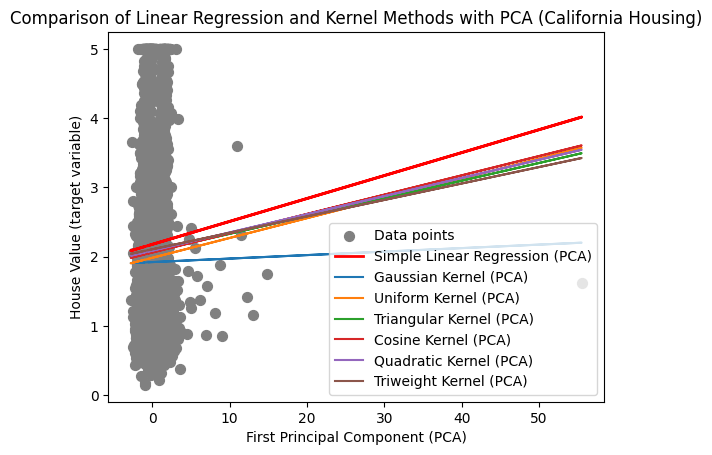


Best Kernel (PCA): Cosine with MSE = 1.3095, R² = 0.0007


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 50  # Number of outliers
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)  # Randomly select indices for outliers

# Add large random values as outliers (e.g., 5 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers  # Replace the selected indices with outliers

# Apply PCA to reduce the data to 1 component for easier visualization
pca = PCA(n_components=1)

# Transform the training and testing data into the first principal component
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the simple linear regression model with PCA-transformed data (with outliers)
simple_model_pca = LinearRegression()
simple_model_pca.fit(X_train_pca, y_train_with_outliers)
y_simple_pred_pca = simple_model_pca.predict(X_test_pca)

# Calculate MSE and R² for the simple linear regression with PCA-transformed data
simple_mse_pca = mean_squared_error(y_test, y_simple_pred_pca)
simple_r2_pca = r2_score(y_test, y_simple_pred_pca)
print(f'Simple Linear Regression with PCA (Outliers): MSE = {simple_mse_pca:.4f}, R² = {simple_r2_pca:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights_pca(X_train_pca, y_train, kernel_func, bandwidth):
    y_pred = simple_model_pca.predict(X_train_pca)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search with PCA-transformed data
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results_pca = []

# Evaluate each kernel with grid search for bandwidth tuning (with PCA-transformed data and outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with PCA-transformed data and outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred_pca = weighted_model.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_weighted_pred_pca)
        r2 = r2_score(y_test, y_weighted_pred_pca)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results_pca.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with PCA (Outliers): Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with PCA-transformed data and outliers
plt.scatter(X_test_pca, y_test, s=50, label='Data points', color='gray')
plt.plot(X_test_pca, y_simple_pred_pca, label='Simple Linear Regression (PCA)', color='red', linewidth=2)

# Plotting the weighted kernel regression models with PCA-transformed data
for name, kernel_func in kernels.items():
    weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred_pca = weighted_model.predict(X_test_pca)
    plt.plot(X_test_pca, y_weighted_pred_pca, label=f'{name} Kernel (PCA)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with PCA (California Housing)')
plt.xlabel('First Principal Component (PCA)')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel_pca = min(results_pca, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel (PCA): {best_kernel_pca[0]} with MSE = {best_kernel_pca[1]:.4f}, R² = {best_kernel_pca[2]:.4f}')

####***--> Applied PCA to Data and then fit SLR and KDLR (200 outliers)***

Simple Linear Regression with PCA (Outliers): MSE = 1.5127, R² = -0.1544
Gaussian Kernel with PCA (Outliers): Best MSE = 1.3094, Best R² = 0.0008, Best Bandwidth = 2.0
Uniform Kernel with PCA (Outliers): Best MSE = 1.3098, Best R² = 0.0004, Best Bandwidth = 5.0
Triangular Kernel with PCA (Outliers): Best MSE = 1.3095, Best R² = 0.0007, Best Bandwidth = 5.0
Cosine Kernel with PCA (Outliers): Best MSE = 1.3094, Best R² = 0.0007, Best Bandwidth = 5.0
Quadratic Kernel with PCA (Outliers): Best MSE = 1.3094, Best R² = 0.0007, Best Bandwidth = 5.0
Triweight Kernel with PCA (Outliers): Best MSE = 1.3095, Best R² = 0.0007, Best Bandwidth = 5.0


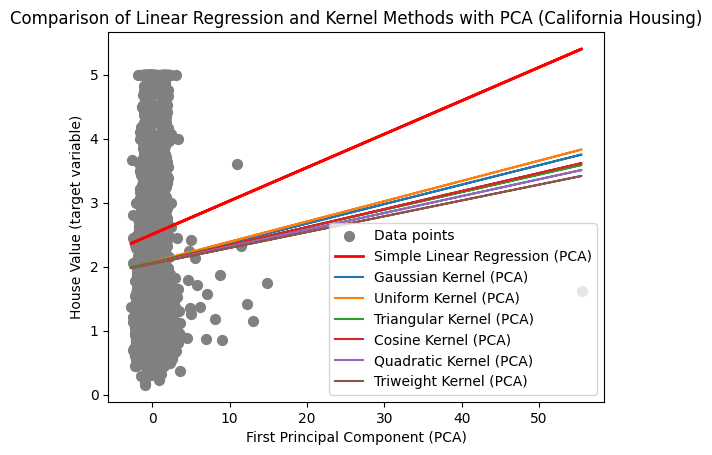


Best Kernel (PCA): Gaussian with MSE = 1.3094, R² = 0.0008


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 200  # Number of outliers
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)  # Randomly select indices for outliers

# Add large random values as outliers (e.g., 5 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers  # Replace the selected indices with outliers

# Apply PCA to reduce the data to 1 component for easier visualization
pca = PCA(n_components=1)

# Transform the training and testing data into the first principal component
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the simple linear regression model with PCA-transformed data (with outliers)
simple_model_pca = LinearRegression()
simple_model_pca.fit(X_train_pca, y_train_with_outliers)
y_simple_pred_pca = simple_model_pca.predict(X_test_pca)

# Calculate MSE and R² for the simple linear regression with PCA-transformed data
simple_mse_pca = mean_squared_error(y_test, y_simple_pred_pca)
simple_r2_pca = r2_score(y_test, y_simple_pred_pca)
print(f'Simple Linear Regression with PCA (Outliers): MSE = {simple_mse_pca:.4f}, R² = {simple_r2_pca:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights_pca(X_train_pca, y_train, kernel_func, bandwidth):
    y_pred = simple_model_pca.predict(X_train_pca)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search with PCA-transformed data
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results_pca = []

# Evaluate each kernel with grid search for bandwidth tuning (with PCA-transformed data and outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with PCA-transformed data and outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred_pca = weighted_model.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_weighted_pred_pca)
        r2 = r2_score(y_test, y_weighted_pred_pca)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results_pca.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with PCA (Outliers): Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with PCA-transformed data and outliers
plt.scatter(X_test_pca, y_test, s=50, label='Data points', color='gray')
plt.plot(X_test_pca, y_simple_pred_pca, label='Simple Linear Regression (PCA)', color='red', linewidth=2)

# Plotting the weighted kernel regression models with PCA-transformed data
for name, kernel_func in kernels.items():
    weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred_pca = weighted_model.predict(X_test_pca)
    plt.plot(X_test_pca, y_weighted_pred_pca, label=f'{name} Kernel (PCA)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with PCA (California Housing)')
plt.xlabel('First Principal Component (PCA)')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel_pca = min(results_pca, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel (PCA): {best_kernel_pca[0]} with MSE = {best_kernel_pca[1]:.4f}, R² = {best_kernel_pca[2]:.4f}')

####***--> Applied PCA to Data and then fit SLR and KDLR (350 outliers)***

Simple Linear Regression with PCA (Outliers): MSE = 1.8926, R² = -0.4443
Gaussian Kernel with PCA (Outliers): Best MSE = 1.3103, Best R² = 0.0001, Best Bandwidth = 5.0
Uniform Kernel with PCA (Outliers): Best MSE = 1.3098, Best R² = 0.0005, Best Bandwidth = 2.0
Triangular Kernel with PCA (Outliers): Best MSE = 1.3161, Best R² = -0.0043, Best Bandwidth = 5.0
Cosine Kernel with PCA (Outliers): Best MSE = 1.3114, Best R² = -0.0008, Best Bandwidth = 5.0
Quadratic Kernel with PCA (Outliers): Best MSE = 1.3132, Best R² = -0.0022, Best Bandwidth = 5.0
Triweight Kernel with PCA (Outliers): Best MSE = 1.3164, Best R² = -0.0046, Best Bandwidth = 5.0


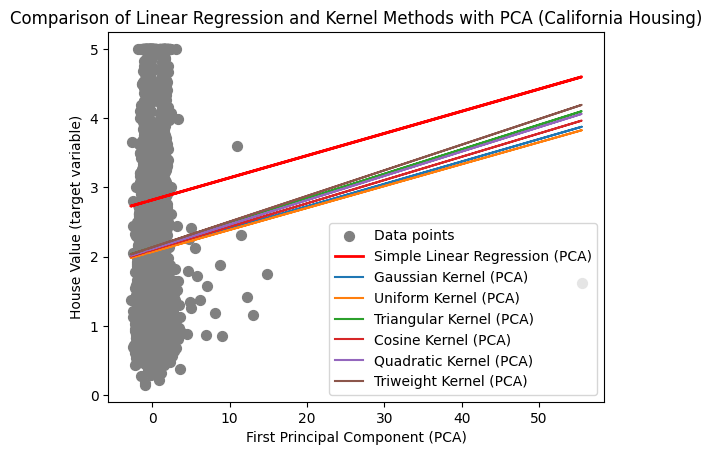


Best Kernel (PCA): Uniform with MSE = 1.3098, R² = 0.0005


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)  # Ensure reproducibility
n_outliers = 350  # Number of outliers
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)  # Randomly select indices for outliers

# Add large random values as outliers (e.g., 5 times the max value)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers  # Replace the selected indices with outliers

# Apply PCA to reduce the data to 1 component for easier visualization
pca = PCA(n_components=1)

# Transform the training and testing data into the first principal component
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the simple linear regression model with PCA-transformed data (with outliers)
simple_model_pca = LinearRegression()
simple_model_pca.fit(X_train_pca, y_train_with_outliers)
y_simple_pred_pca = simple_model_pca.predict(X_test_pca)

# Calculate MSE and R² for the simple linear regression with PCA-transformed data
simple_mse_pca = mean_squared_error(y_test, y_simple_pred_pca)
simple_r2_pca = r2_score(y_test, y_simple_pred_pca)
print(f'Simple Linear Regression with PCA (Outliers): MSE = {simple_mse_pca:.4f}, R² = {simple_r2_pca:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights_pca(X_train_pca, y_train, kernel_func, bandwidth):
    y_pred = simple_model_pca.predict(X_train_pca)
    distances = np.abs(y_pred - y_train[:, np.newaxis])  # Calculate the distance from predictions
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)  # Average weights for each point
    return weights / np.sum(weights)  # Normalize weights

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search with PCA-transformed data
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Search over a range of bandwidth values

results_pca = []

# Evaluate each kernel with grid search for bandwidth tuning (with PCA-transformed data and outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    # Tune bandwidth for each kernel with PCA-transformed data and outliers
    for bandwidth in bandwidth_values:
        weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred_pca = weighted_model.predict(X_test_pca)

        mse = mean_squared_error(y_test, y_weighted_pred_pca)
        r2 = r2_score(y_test, y_weighted_pred_pca)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results_pca.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with PCA (Outliers): Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with PCA-transformed data and outliers
plt.scatter(X_test_pca, y_test, s=50, label='Data points', color='gray')
plt.plot(X_test_pca, y_simple_pred_pca, label='Simple Linear Regression (PCA)', color='red', linewidth=2)

# Plotting the weighted kernel regression models with PCA-transformed data
for name, kernel_func in kernels.items():
    weights = calculate_weights_pca(X_train_pca, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_pca, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred_pca = weighted_model.predict(X_test_pca)
    plt.plot(X_test_pca, y_weighted_pred_pca, label=f'{name} Kernel (PCA)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with PCA (California Housing)')
plt.xlabel('First Principal Component (PCA)')
plt.ylabel('House Value (target variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel_pca = min(results_pca, key=lambda x: (x[1], -x[2]))  # Minimize MSE, Maximize R²
print(f'\nBest Kernel (PCA): {best_kernel_pca[0]} with MSE = {best_kernel_pca[1]:.4f}, R² = {best_kernel_pca[2]:.4f}')

####***--> Introduced 50 outliers [Univariate Case]***

Simple Linear Regression with Outliers: MSE = 0.7200, R² = 0.4506
Gaussian Kernel with Outliers: Best MSE = 0.7092, Best R² = 0.4588, Best Bandwidth = 5.0
Uniform Kernel with Outliers: Best MSE = 0.7091, Best R² = 0.4589, Best Bandwidth = 5.0
Triangular Kernel with Outliers: Best MSE = 0.7128, Best R² = 0.4561, Best Bandwidth = 5.0
Cosine Kernel with Outliers: Best MSE = 0.7104, Best R² = 0.4579, Best Bandwidth = 5.0
Quadratic Kernel with Outliers: Best MSE = 0.7127, Best R² = 0.4562, Best Bandwidth = 5.0
Triweight Kernel with Outliers: Best MSE = 0.7162, Best R² = 0.4534, Best Bandwidth = 5.0


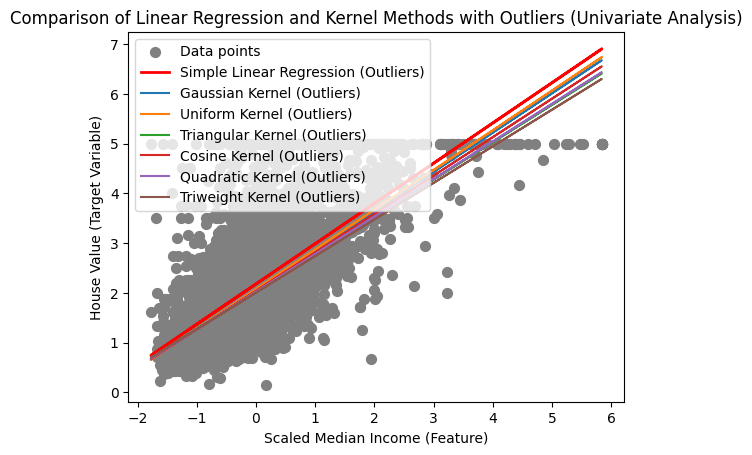


Best Kernel: Uniform with MSE = 0.7091, R² = 0.4589


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data[:, [0]]  # Select the first feature (MedInc: median income)
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)
n_outliers = 50
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers

# Fit the simple linear regression model with outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for the simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)
    return weights / np.sum(weights)

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]
results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with outliers
plt.scatter(X_test_scaled, y_test, s=50, label='Data points', color='gray')
plt.plot(X_test_scaled, y_simple_pred_with_outliers, label='Simple Linear Regression (Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(X_test_scaled, y_weighted_pred, label=f'{name} Kernel (Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with Outliers (Univariate Analysis)')
plt.xlabel('Scaled Median Income (Feature)')
plt.ylabel('House Value (Target Variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')

####***--> Introduced 350 outliers [Univariate Case]***

Simple Linear Regression with Outliers: MSE = 1.2637, R² = 0.0356
Gaussian Kernel with Outliers: Best MSE = 0.7089, Best R² = 0.4590, Best Bandwidth = 5.0
Uniform Kernel with Outliers: Best MSE = 0.7091, Best R² = 0.4589, Best Bandwidth = 5.0
Triangular Kernel with Outliers: Best MSE = 0.7104, Best R² = 0.4579, Best Bandwidth = 5.0
Cosine Kernel with Outliers: Best MSE = 0.7091, Best R² = 0.4589, Best Bandwidth = 5.0
Quadratic Kernel with Outliers: Best MSE = 0.7098, Best R² = 0.4583, Best Bandwidth = 5.0
Triweight Kernel with Outliers: Best MSE = 0.7113, Best R² = 0.4572, Best Bandwidth = 5.0


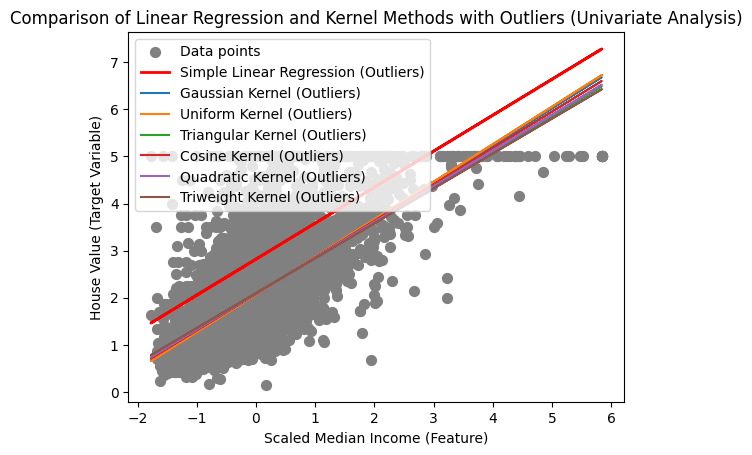


Best Kernel: Gaussian with MSE = 0.7089, R² = 0.4590


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Custom Kernel Functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 * (np.abs(u) <= 1).astype(float)

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - np.abs(u)) * (np.abs(u) <= 1).astype(float)

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) * (np.abs(u) <= 1).astype(float)

def quadratic_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1).astype(float)

def triweight_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (35 / 32) * (1 - u**2)**3 * (np.abs(u) <= 1).astype(float)

# Load California Housing Dataset
california = fetch_california_housing()
X = california.data[:, [0]]  # Select the first feature (MedInc: median income)
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce outliers into the target variable `y`
np.random.seed(42)
n_outliers = 350
outlier_indices = np.random.choice(len(y_train), size=n_outliers, replace=False)
outliers = np.random.uniform(5 * np.max(y_train), 10 * np.max(y_train), size=n_outliers)
y_train_with_outliers = y_train.copy()
y_train_with_outliers[outlier_indices] = outliers

# Fit the simple linear regression model with outliers
simple_model_with_outliers = LinearRegression()
simple_model_with_outliers.fit(X_train_scaled, y_train_with_outliers)
y_simple_pred_with_outliers = simple_model_with_outliers.predict(X_test_scaled)

# Calculate MSE and R² for the simple linear regression with outliers
simple_mse_with_outliers = mean_squared_error(y_test, y_simple_pred_with_outliers)
simple_r2_with_outliers = r2_score(y_test, y_simple_pred_with_outliers)
print(f'Simple Linear Regression with Outliers: MSE = {simple_mse_with_outliers:.4f}, R² = {simple_r2_with_outliers:.4f}')

# Define a function to calculate weights based on the specified kernel
def calculate_weights(X_train, y_train, kernel_func, bandwidth):
    y_pred = simple_model_with_outliers.predict(X_train)
    distances = np.abs(y_pred - y_train[:, np.newaxis])
    weights = np.mean(kernel_func(distances, bandwidth), axis=1)
    return weights / np.sum(weights)

# Define the kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
    "Quadratic": quadratic_kernel,
    "Triweight": triweight_kernel
}

# Tune the bandwidth value using grid search
bandwidth_values = [0.1, 0.5, 1.0, 2.0, 5.0]
results = []

# Evaluate each kernel with grid search for bandwidth tuning (with outliers)
for name, kernel_func in kernels.items():
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_bandwidth = None

    for bandwidth in bandwidth_values:
        weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, bandwidth)
        weighted_model = LinearRegression()
        weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
        y_weighted_pred = weighted_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_weighted_pred)
        r2 = r2_score(y_test, y_weighted_pred)

        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_bandwidth = bandwidth

    results.append((name, best_mse, best_r2, best_bandwidth))
    print(f'{name} Kernel with Outliers: Best MSE = {best_mse:.4f}, Best R² = {best_r2:.4f}, Best Bandwidth = {best_bandwidth}')

# Plotting the simple linear regression with outliers
plt.scatter(X_test_scaled, y_test, s=50, label='Data points', color='gray')
plt.plot(X_test_scaled, y_simple_pred_with_outliers, label='Simple Linear Regression (Outliers)', color='red', linewidth=2)

# Plotting the weighted kernel regression models
for name, kernel_func in kernels.items():
    weights = calculate_weights(X_train_scaled, y_train_with_outliers, kernel_func, best_bandwidth)
    weighted_model = LinearRegression()
    weighted_model.fit(X_train_scaled, y_train_with_outliers, sample_weight=weights)
    y_weighted_pred = weighted_model.predict(X_test_scaled)
    plt.plot(X_test_scaled, y_weighted_pred, label=f'{name} Kernel (Outliers)', linewidth=1.5)

plt.title('Comparison of Linear Regression and Kernel Methods with Outliers (Univariate Analysis)')
plt.xlabel('Scaled Median Income (Feature)')
plt.ylabel('House Value (Target Variable)')
plt.legend()
plt.show()

# Find the best kernel based on MSE and R²
best_kernel = min(results, key=lambda x: (x[1], -x[2]))
print(f'\nBest Kernel: {best_kernel[0]} with MSE = {best_kernel[1]:.4f}, R² = {best_kernel[2]:.4f}')